# Spectral Graph Theory (SGT)

This notebook uses Python (especially NetworkX) to explore properties of graphs.
The plan is to spell out and validate some basics of spectral graph theory (SGT). 


I have had very *coarse* functional comprehension linear algebra. 
For example I understood the basics of SVD well enough for some least 
squares results in graduate school. Recently I've been motivated to 
start over properly with linear algebra. (I recommend Grant Sanderson's
overview video series for this.) Some of the narrative in this SGT 
sequence includes comprehension remarks on linear algebra. 


## Motivation


Having played around with graphs for some time now -- since about 2005 or so -- I would 
describe basic graph theory as a gateway to math that doesn't follow the standard
curriculum of *geometry, algebra, calculus*. In fact graphs feel like an interesting
mesh of set theory and logic in addition to their obvious visual nature and 
their slightly less obvious combinatoric nature. I think the standard curriculum 
concept deserves its own essay but... another time.


I will try to indicate the enjoyable nature of graph-theoretic problems by sketching
a problem I solved: To prove that a graph with $2n$ vertices ($n \; \ge \; 2$) 
and $n^2 + 1$ edges contains a triangle. After looking at this for some time...
trying out numerous dead ends... I finally hit on the idea of counting
the number of edges that would not be permitted, insofar as any one of them 
would create a triangle. This is interesting because it seems to be moving
in the opposite direction of the objective, which is to show that a triangle
*is* present in such a graph regardless of how the edges are arranged. But it 
is in fact a very productive way to proceed. By 
assuming that a triangle is *not* present the argument revolves around the idea
that the number of edges present in the graph (given) plus the number of edges 
forbidden because they would impose a triangle is greater than the number of 
edges available in the graph with the specified number of vertices. The 
conclusion is that the set of edges that exist must have some overlap with
the set of edges that cause triangles; so there must be a triangle. 


This sort of *existence proof* is very different than a calculation result
(say from precalculus) because of its general nature. The answer here is not
a specific one-off like '$(3, \; 17)$'.  I think this illustrates how graph theory 
is at once accessible, unbounded and amenable to progress.
This is attractiveness idea I have read about in biographical sketches of one of 
its principal early practitioners, the Hungarian mathematician 
Paul Erd&#X00F6;s.


Points of entry for graph-theoretic explorations include... (references appear below)


* Fan Chung's excellent book **Spectral Graph Theory**.
* [NetworkX](http://networkx.github.io/) ([wikipedia](https://en.wikipedia.org/wiki/NetworkX))
an ever-expanding library of functionality
    - Example: NetworkX can quickly generate a random geometric graph.
        - Such a graph is stipulated as $n$ vertices with a distance threshold $t$ 
        - The result is a uniform distribution in 2D space, with edges placed if $dist(u, \; v)\; <\; t$
* A very accessible lecture on heat propagation in a graph
* Ross Honsberger's excellent presentations of graph theory topics in his ***Gems*** books
* More encouragements from popular math literature including Aigner and Ziegler's ***Proofs from the Book*** and of course from Martin Gardner




In [1]:
import sys          # used to halt the program
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import random as r
from numpy import zeros
import warnings; warnings.simplefilter('ignore')

In [22]:
def eigensketch(G, threshold = 9):
    import numpy.linalg

    n = len(G.nodes())
    L = nx.normalized_laplacian_matrix(G)
    e, v = numpy.linalg.eig(L.A)
    e.sort()

    e = [e[i] if e[i] > 1e-14 else 0 for i in range(len(e))]
    msg = "Eigenvalues: "
    nTerms = min(n, threshold)
    msg += '%.2f' % e[0]
    for i in range(1, nTerms): msg += ', ' + '%.2f' % e[i]
    if   n == threshold + 1: msg += ', ' + '%.2f' % e[-1]
    elif n == threshold + 2: msg += ', ' + '%.2f' % e[-2] + ', ' + '%.2f' % e[-1]
    elif n  > threshold + 2: msg += ', ..., ' + '%.2f' % e[-2] + ', ' + '%.2f' % e[-1]

    print(msg)
    
def hamiltonian(G):
    F = [(G,[list(G.nodes())[0]])]   # A one-element list -> a 2-ple [(G, label of node 0 of G)]
    n = G.number_of_nodes()
    while F:
        graph,path = F.pop()
        confs = []
        neighbors = (node for node in graph.neighbors(path[-1]) if node != path[-1]) #exclude self loops
        for neighbor in neighbors:
            conf_p = path[:]
            conf_p.append(neighbor)
            conf_g = nx.Graph(graph)
            conf_g.remove_node(path[-1])
            confs.append((conf_g,conf_p))
        for g,p in confs:
            if len(p) == n: return p
            else:           F.append((g,p))
    return None

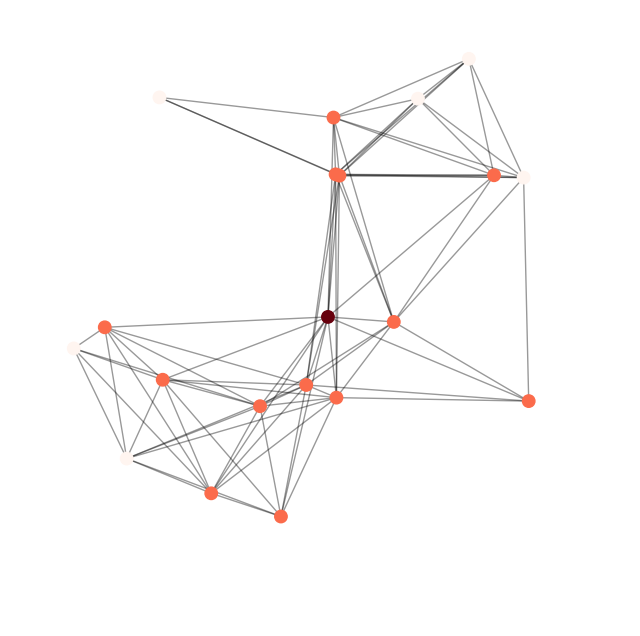

In [2]:
# A random geometric graph creates edges based on thresholded proximity
G = nx.random_geometric_graph(20, 0.40)

# position is stored as node attribute data for random_geometric_graph
#   That is, it is a set of 2-D coordinates for each node
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

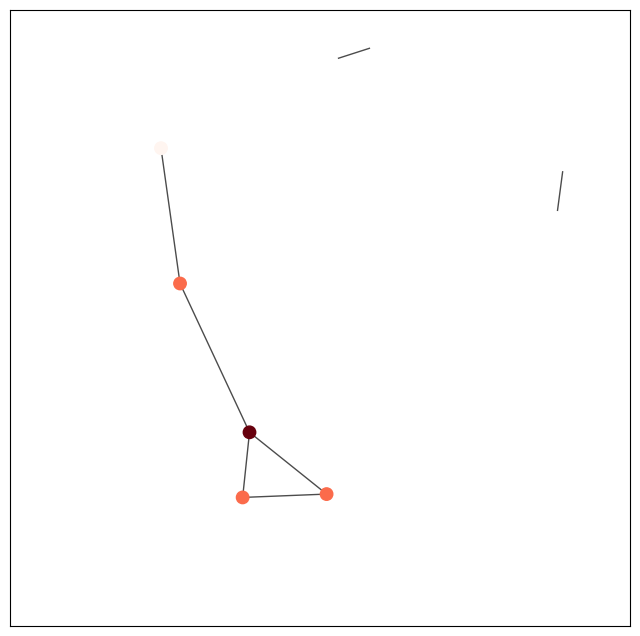

True

In [20]:
# A random geometric graph creates edges based on thresholded proximity
n_nodes = 10
proximity = .3
G = nx.random_geometric_graph(n_nodes, proximity)

# position is stored as node attribute data for random_geometric_graph
#   That is, it is a set of 2-D coordinates for each node
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.7)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
# plt.axis('off')
plt.show()
nx.is_planar(G)

True

In [24]:
# star graph checks out: e = 0, 1, 1, 1, 1, ..., 1, 1, 2
# G = nx.Graph()
# for i in range(1,50): G.add_edge(0,i)

# Path Pn checks out: 1 - cos (pi * k/(n-1))
# n, G = 8, nx.Graph()
# for i in range(n-1): G.add_edge(i, i+1)

# Cycle Cn checks out: 1 - cos (2 * pi * k/n)
# n, G = 8, nx.Graph()
# for i in range(n-1): G.add_edge(i, i+1)
# G.add_edge(0, n-1)

# ncube Qn checks out: 2k/n with multiplicity n-choose-k
#                      (4 choose k goes 1, 4, 6, 4, 1)
#                      Expect 1 zero, 4 0.5, 6 1.0, 4 1.5, 1 2.0 
# Version 1:
# G = nx.Graph(); G.add_edge(0, 1); ... ; G.add_edge(14, 15) (take your time)
#
# Versions 2:
G = nx.hypercube_graph(8)

In [25]:
print(G)

Graph with 256 nodes and 1024 edges


In [26]:
eigensketch(G, 18)


Eigenvalues: 0.00, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, ..., 1.75, 2.00


In [27]:
nx.laplacian_spectrum(G)/10

array([-2.06558592e-19,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  4.00000000e-01,  4.00000000e-01,  4.00000000e-01,
        4.00000000e-01,  4.00000000e-01,  4.00000000e-01,  4.00000000e-01,
        4.00000000e-01,  4.00000000e-01,  4.00000000e-01,  4.00000000e-01,
        4.00000000e-01,  4.00000000e-01,  4.00000000e-01,  4.00000000e-01,
        4.00000000e-01,  4.00000000e-01,  4.00000000e-01,  4.00000000e-01,
        4.00000000e-01,  4.00000000e-01,  4.00000000e-01,  4.00000000e-01,
        4.00000000e-01,  4.00000000e-01,  4.00000000e-01,  4.00000000e-01,
        4.00000000e-01,  6.00000000e-01,  6.00000000e-01,  6.00000000e-01,
        6.00000000e-01,  6.00000000e-01,  6.00000000e-01,  6.00000000e-01,
        6.00000000e-01,  6.00000000e-01,  6.00000000e-01,  6.00000000e-01,
        6.00000000e-01,  6.00000000e-01,  6.00000000e-01,  6.00000000e-01,
        6.00000000e-01,  

In [28]:
nx.number_connected_components(G)

1

In [29]:
nx.is_eulerian(G)

True

In [30]:
G = nx.random_geometric_graph(15, 0.40)
F = hamiltonian(G)
print(F)

None


```
F = hamiltonian(G)    # run with 20 vertices and p = 0.4; single component graph
F                     # will give an H path (not cycle)

[0, 3, 4, 16, 19, 17, 14, 13, 11, 12, 18, 9, 8, 5, 7, 1, 10, 6, 15, 2]
```

Let's decipher the brute force code above. $n$ is the number of nodes in $G$. Here is a paraphrase of a repl: 

```
F = [(G,[list(G.nodes())[0]])]
print(type(F[0]), len(F[0]), type(F[0][0]), type(F[0][1]), len(F[0][1]), type(F[0][1][0]), F[0][1][0])

'tuple', 2, graph G, 'list', 1, 'int', 0
```

From this we see that F is a list of one element; which is a 2-ple: The passed graph G and (second) a list of length 1, with list[0] = 0. 
This zero is the index of the first element of G's node list, i.e. the start of a path. The second element of the tuple (i.e. the list) 
will prove to be a path of vertices. 


The `while` loop runs until `F` is empty.


`graph, path = F.pop()` breaks out the `F` tuple into `graph` and `path`; leaving `F` an empty list after the pop(). Remember `path` will grow.


`confs` is an empty list that grows as we go. It accumulates (Graph, path-list) tuples.


`neighbors` is a list of nodes that are neighbors to the last node on the working `path`... excluding that node itself. This implies that if 
G has self-loops then `.neighbors(node)` would include 'myself'.  

Incidentally `G.neighbors(node)` returns an enumerable; I found it expedient to use it like `range()`: 

```
for i in G.neighbors(4): print(i)

9 18 11 13 6 8 17 19 1 3 12 5 14 7 16
```

As the while progresses brute force additions are made to generate new paths and graphs that have the newest path vertext removed. 
I'll leave it at that for now but it is an interesting bit of code. 

In [31]:
fred = [0]
first = fred.pop()
if fred: print('fred is true')
else: print('nope')
fred = []
if fred: print('fred is true')
else: print('nope')

nope
nope


In [32]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [33]:
G.edges()

EdgeView([(0, 4), (0, 6), (0, 10), (0, 12), (0, 14), (1, 3), (1, 5), (1, 7), (1, 8), (2, 4), (2, 9), (2, 10), (2, 12), (2, 14), (3, 8), (3, 11), (4, 6), (4, 10), (4, 12), (4, 14), (5, 7), (5, 9), (5, 12), (6, 10), (6, 12), (8, 11), (9, 10), (9, 12), (9, 13), (9, 14), (10, 12), (10, 14), (12, 14)])

In [34]:
n4s = 0
for edge in G.edges: n4s += 1 if 4 == edge[0] or 4 == edge[1] else 0
n4s

6

In [35]:
type(G.edges())

networkx.classes.reportviews.EdgeView

## Spectral graph theory

A slider-based experimentation space would be nice. For now I'll continue with static content.
A graph $G$ is a pair of related sets $V$ and $E$ where$|V|=n$. The elements of $E$ are 
un-ordered pairs of elements of $V$ with no repeats. A particular vertex is often called
$u$ or $v$ and each vertex has degree $d_u$. We disallow loops and multiple edges at the
start, noting that multiple edges can be interpreted as edge weights in future developments. 
A graph may have multiple connected components. We'll generally take $n \ge 2$ as assumed.


There is a lot of additional preliminary terminology to set up.

* $1$
* $vol\;G\;=\;\sum_{v}{d_v}$

## References

- [Spectral Graph Theory (Chung, 1997)](https://books.google.com/books?hl=en&lr=&id=4IK8DgAAQBAJ&oi=fnd&pg=PP1&dq=spectral+graph+theory&ots=Es2N2jsQui&sig=Z3SPsvf1yXFpUb4DQsrGRw_7zFI#v=onepage&q=spectral%20graph%20theory&f=false)
- [Spielman course notes](http://www.cs.yale.edu/homes/spielman/561/)
- [Spielman lecture deck (88 slides)](http://www.cs.yale.edu/homes/spielman/TALKS/haifa1.pdf)
- [Unreasonable effectiveness of SGT (toroidal heat lecture](https://youtu.be/8XJes6XFjxM)

### Jumping into SGT

- A graph can be represented as either a Laplacian or a normalized Laplacian $n\;\times\;n$ matrix
- For an un-directed graph this will be real symmetric and will have real non-negative eigenvalues
- These $n$ eigenvalues are sorted in increasing order $\{\lambda_0,\;\lambda_1,\;\lambda_2\;\dots\;\lambda_{n-1}\}$
    - ...using Chung's subscript notation beginning at 0
- The number of 0 eigenvalues corresponds to the number of connected components.


Define a cut as a (minimal) collection of cut edges to break the graph into disconnected sub-graphs.
Cuts indicate relatively low connectivity.

Isoperimetric ratio $\theta(S)$ I refer to as IPR. 

Important in getting to Cheeger's inequality: Rayleigh quotients of eigenvalues orthogonal to
the $1$ vector corresponding to $\lambda_0=0$. The RQ is used in an upper bound on IPR. The 
second eigenvalue $\lambda_1$ is used in like fashion to give an upper bound of the IPR of G. 
That is we want to find vertex subsets S with low isoperimetry.

Something like $\theta(S_t)\le \sqrt{2d\lambda_1}$.

It would be helpful to work some examples. 

Cheeger's inequality can be generalized for k-clustering. 

### Spectral graph theory talk part 2

Max flow problem: Push as much flow as possible from $s$ to $t$ without exceeding the flow capacity of the edges. 

That is: Given a directed graph with flows indicated as directions and edge capacities as positive numbers. 
There are two key vertices. Ford-Fulkerson (FF) algorithm cited. $O(mF)$ time. Blocking Flow speeds things up; to
$O(m^{3/2})$ time. A sequence of augmentations. 

Exploiting the relation between distance and cut size accelerates Blocking Flow as an algorithm in comparison 
with FF. 

#### Graph partitioning and region growing

For any value R > 0 can partition a graph into n clusters with some properties... 

M is a 'net flow' matrix. 

Use electrical flows; Laplacian linear system; fast to solve. 

Refers to $l_1, \; l_2, \; \dots \;,l_\infty$.







### Why we want to win the karate trophy


Aric Hagberg (speaker) with nods en passant to Dan Schult, Jarrod Millman


* Open data at Los Alamos National Lab? [you bet!](csr.lanl.gov/data)
  * includes ML on graphs and synthetic bad guys
  * Unified Host and Network Data Set: no doi.
  * Comprehensive Multi-Source Cyber-Security Events doi:10.17021/1179829
  * User-Computer authentication associateions in time doi:10.11578/1160076

### More talks

- Human brain longitudinal progression studies: Implies a kind of graph superposition.

- Graph clustering
- Second eigenvalue to select out
- LocalGraphClustering search on GitHub... 100e6-edge graphs on a laptop


#### Sequence Assembly Graphs and their construction

* PhD student Titus Brown lab UCD
* assembly graphs
* de Bruijn graphs have implicitly defined edges: 
  - I can find its neighbors by querying the set of vertices... etcetera
  - the sequence length parameter $k$ is the critical optimization
  - these graphs are easy to implement but tend to memory intensive

In [36]:
import numpy.linalg

# These imports give us control sliders that we use for selecting depth slices from the dataset
from ipywidgets import *
from traitlets import dlink
 
e = []
v = []

# This creates a 2D color-coded view of oxygen at the surface, attaching a slider to a depth parameter
def DrawSomeGraph(type_choice, n, control, layout):
    
    global e, v
    
    plt.figure(num=None, figsize=(6,6), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    
    title_string = 'i was never given a title for this... odd'

    probability = float(control)/100.0

    if type_choice == 0: # G(n,m) chooses one possible graph with n vertices and m edges at random
        m = control # number of edges
        G = nx.gnm_random_graph(n, m)
        title_string = 'Randomly chosen from among all graphs with m vertices and n edges'
    elif type_choice == 1: 
        G = nx.random_graphs.erdos_renyi_graph(n, probability)
        title_string = 'Erdos-Renyi random graph with probability ' + str(probability)
    elif type_choice == 2:
        # Use this graph to win a trophy at an information theory conference
        G=nx.karate_club_graph()
        title_string = 'The Karate club graph; go claim your trophy!'
    elif type_choice == 3: 
        G = nx.heawood_graph()
        title_string = 'Heawood graph, a cubic graph on 14 vertices with girth 6'
    elif type_choice == 4:
        k = min(n, 5)
        G = nx.newman_watts_strogatz_graph(n, k, probability)
        title_string = 'Small world graph'
    elif type_choice == 5: 
        k = min(n, 10)
        G = nx.powerlaw_cluster_graph(n, k, probability)
        title_string = 'Power law cluster graph'
    elif type_choice == 6: 
        k = int(control * n / 100)
        if k < 1: k = 1
        G = nx.barabasi_albert_graph(n, k)
        title_string = 'Preferential attachment graph'
    elif type_choice == 7: 
        G = nx.complete_graph(n)
        title_string = 'complete graph'
    elif type_choice == 8: 
        G = nx.complete_multipartite_graph(n, control)
        title_string = 'complete bipartite n, m'
    elif type_choice == 9: 
        # since the size parameter is a dimension (exponent) we auto-curtail this
        if n > 7: n = 7
        G = nx.hypercube_graph(n)
        title_string = 'Hypercube graph where n is now the dimension'
    elif type_choice == 10: 
        G = nx.random_lobster(n, probability, probability)
        title_string = 'random lobster with both probabilities ' + str(probability)
    else:
        distance_threshold = float(control)/100.
        G = nx.random_geometric_graph(n, distance_threshold)
        title_string = 'random geometric using a threshold of ' + str(distance_threshold)

    
    # Use the layout parameter to choose an arrangement scheme
    if layout == 0:
        pos=nx.circular_layout(G)
        title_string += '    (circular)'
    elif layout == 1:
        pos=nx.random_layout(G) 
        title_string += '    (random)'
    elif layout == 2:
        if type_choice == 9:
            # Multiple shells hang on a hypercube 
            pos=nx.shell_layout(G)
        else: 
            shells = []
            nShells = 1
            if n > 5: nShells += 1
            if n > 11: nShells += 1
            if n > 36: nShells += 1
            if n > 72: nShells += 1
            deltaShell = int(n / nShells)
            # n = 43 gives nShells = 4, deltaShell = 10; 0-10, 10-20, 20-30, 30-40
            for i in range(nShells):
                shells.append(range(int(i*deltaShell), int((i+1)*deltaShell)))
            if n > nShells * deltaShell: 
                shells.append(range(int(nShells*deltaShell), n))
            pos=nx.shell_layout(G, shells) 
        title_string += '    (shell)'
    elif layout == 3:
        pos=nx.spring_layout(G) 
        title_string += '    (spring)'
    elif layout == 4:
        pos=nx.spectral_layout(G)
        title_string += '    (spectral)'
    else: # there is a 'graphviz' layout but not using this 'pos =' mechanism
        pos=nx.circular_layout(G)
        title_string += '    (circular)'
    
    # This does not work properly
    # nx.draw(G)
    cut = 1.1
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    xmin = cut * min(xx for xx, yy in pos.values())
    ymin = cut * min(yy for xx, yy in pos.values())
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title_string)

    nx.draw_networkx(G,pos,with_labels=False,node_size=50,node_color='blue')
    plt.show()
    
    # print(title_string)
    
    L = nx.normalized_laplacian_matrix(G)
    e, v = numpy.linalg.eig(L.A)
    e.sort()
    for i in range(len(e)):
        if e[i] < 1.0e-14: e[i] = 0
    eivstring = "Eigenvalues:"
    nTerms = min(n, 9)
    for i in range(nTerms):
        eivstring += '%.3f' % e[i] + ', '
    if n > 10: eivstring += ', ..., '
    eivstring += '%.3f' % e[n-1]
    print(eivstring)
    # plt.hist(e, bins=100)  # histogram with 100 bins
    # plt.xlim(0, 2)  # eigenvalues between 0 and 2 
          
# This is the interactive slider
interact(DrawSomeGraph, 
            type_choice={'Gnm random': 0, \
                         'Erdos-Renyi random': 1, \
                         'Karate Club': 2, \
                         'Heawood Graph': 3, \
                         'Small world': 4, \
                         'Power law cluster': 5, \
                         'Preferential attachment': 6, \
                         'Complete': 7, \
                         'Complete Bipartite': 8, \
                         'Hypercube': 9, \
                         'Random Lobster': 10 \
                        }, 
            # type_choice=widgets.IntSlider(min=0,max=20,step=1,value=2, continuous_update=False),
            n=widgets.IntSlider(min=2,max=100,step=1,value=10, continuous_update=False),
            control=widgets.IntSlider(min=0,max=100,step=1,value=50,continuous_update=False),
            layout = {'circular': 0, \
                      'random': 1, \
                      'shell': 2, \
                      'spring': 3, \
                      'spectral': 4
                        }
        )

interactive(children=(Dropdown(description='type_choice', options={'Gnm random': 0, 'Erdos-Renyi random': 1, '…

<function __main__.DrawSomeGraph(type_choice, n, control, layout)>

In [18]:
print(e, v)

[0.         0.28571429 0.28571429 0.28571429 0.28571429 0.28571429
 0.28571429 0.28571429 0.57142857 0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 1.14285714 1.14285714
 1.14285714 1.14285714 1.14285714 1.14285714 1.14285714 1.14285714
 1.14285714 1.14285714 1.14285714 1.14285714 1.14285714 1.14285714
 1.14285714 1.14285714 1.14285714 1.14285714 1.14285714 1.14285714
 1.14285714 1.14285714 1.14285714 1.14285714 1.14285714 1.1428

In [19]:
import inspect
print(inspect.getdoc(numpy.linalg.eig))

Compute the eigenvalues and right eigenvectors of a square array.

Parameters
----------
a : (..., M, M) array
    Matrices for which the eigenvalues and right eigenvectors will
    be computed

Returns
-------
A namedtuple with the following attributes:

eigenvalues : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

eigenvectors : (..., M, M) array
    The normalized (unit "length") eigenvectors, such that the
    column ``eigenvectors[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``eigenvalues[i]``.

Raises
------
LinAlgError
    If the eigenvalue computation does not converge.

See Also
--------
eigvals : eigenvalues of a non-symmetric array.
eigh

In [21]:
if False: dir(nx)

In [ ]:
import inspect
print(inspect.getdoc(nx.random_graphs.erdos_renyi_graph))

In [ ]:
print(inspect.getdoc(nx.draw))